<a href="https://colab.research.google.com/github/Saqueb/Quantum-Computation/blob/main/Quantum_Computation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Quantum Computation Project**
AIM: To Find the equilibrium distance between two atoms in a Hydrogen Molecule and to calculate the ground-state & Excited-state energies along with the correspoding dipole moment along different axes as well as the total dipole moment of the Molecule

---



---



# **1. Introduction**
The molecular Hamiltonian is defined as,
$$ H = - \sum_I \frac{\nabla^2_{R_I}}{M_I} - \sum_i \frac{∇^2_{r_i}}{m_e} - \sum_I \sum_i \frac{Z_I e^2}{|R_I -r_i|} + \sum_i \sum_{j>i} \frac{e^2}{|r_i-r_j|} + \sum_I \sum_{J>I} \frac{Z_I Z_J e^2}{|R_I -R_J|}$$

Here, we use the Born-oppenheimer approximation which assumes the nuclei to be stationary. Hence, the behaviour of nuclei and electrons can be decoupled. Hence, we can approximate the Hamiltonian as,

$$ H_{el} = - \sum_i \frac{∇^2_{r_i}}{m_e} - \sum_I \sum_i \frac{Z_I e^2}{|R_I -r_i|} + \sum_i \sum_{j>i} \frac{e^2}{|r_i-r_j|} $$

We have to solve this hamiltonian in order to obtain energy states. However, we cannot do this on a classical computer as our hamiltonian consist of electron-electron interaction which need to be solved as a two-body prpblem. Solving this on a classical computer will be disastoruos and may not yeild the exact result. However, the VQE approach can solve this very easily and also yeild the exact result. 

---



---



## **2.Understanding the VQE**
In 2014, Peruzzo et al. proposed VQE to estimate the ground state energy of a molecule. This algorithm uses the basic principle of Variational method in quantum mechanics which is used to caluculate the ground state energy of a system.
  
  We know that the variational principle in quantum mechanics states that, for an arbitrary quantum state $ |\Psi (\theta)\rangle $:   

$$ E_{gs} \leq E_{|\Psi (\theta)\rangle} $$  

where, $E_{gs}$ is the ground state of the specified hamiltonian.

Now in order to obtain the solution for the hamiltonian we first need to reduce the hamiltonian and operators of the system to a form that can be solved analytically.

---



### 2.1 Fermionic space to Qubit Space
First we have to understand how we can covert the Hamiltonian and operators from fermionic space to Qubit space. 

1. Mapping between states:- A mapping of slater determinants to Qubit states. We have many types of mapping such as, Jordan_weigner mapping, parity mapping, etc.
2. Reconstructing fermionic algebra in Qubit-space. For example, we represent the Jordan-Weigner mapping as,
$$a^{\dagger}_i = (\prod_{j<i} \sigma^z_j) \sigma^{+}_i \longmapsto \text{Creation Operator}$$
$$a_i = (\prod_{j<i} \sigma^z_j) \sigma^{-}_i \longmapsto \text{Annhilation Operator}$$
![](https://qiskit.org/documentation/nature/_images/jw_mapping.png)


---


### 2.2 Tapering of Qubits
One can reduce the number of Qubits required in simulation. Some examples are:

(a) If the Hamiltonian is symmetric, finding these symmetries are very important. 

(b) One can even freeze the orbitals of ground states, i.e., by not taking any qubit corresponding to the ground state.


---



### 2.3 Trial state preparation (Ansatz)
First, we assign |0> state to all Qubits. Then we assign single qubit-gates to these qubits. Then we assign a entangler block to all the qubits, and then we repeat the sequence as many times as required. These single qubit gates and the entanglers are there to add the paramteres that are required for the trial state.


---


### 2.4 Energy measurement
Now we try to find the minimum energy of the state, and for that we try to optimize the paramaters using classical optimizers, and we measure the energy again and we try to find the required state at which the system will have the minimum energy.
$$E = \frac{<\psi_0 |H_{el}|\psi_o>}{<\psi_0|\psi_0>}$$


---



---



In [ ]:
pip install qiskit-nature[pyscf]

In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-nature

In [ ]:
pip install pyscf

# **1. Equilibrium distance between the hydrogen atoms in a Hydrogen Molecule and the corresponding energy**



In [ ]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.providers.aer import StatevectorSimulator
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_nature.algorithms import VQEUCCFactory
from qiskit_nature.algorithms import GroundStateEigensolver
from qiskit.algorithms import VQE
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms import NumPyMinimumEigensolver

In order to calculate the equilibrium distance between two atoms in a Hydrogen Molecule, we first define the molecule which has a variable separation. Next, using NumPyMinimumEigensolver we calculate the energy of the system corresponding to each separation. We store all these energy to an array from where we extract the minimum energy.

In [ ]:
distances = np.arange(0.5, 1.0, 0.01)
vqe_energies = []
exact_energies = []
dist2 = []
dev = 0

for dist in distances:
    molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                                ['H', [0., 0., dist]]],
                        charge=0, multiplicity=1)
    driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)
    es_problem = ElectronicStructureProblem(driver)# 
    numpy_solver = NumPyMinimumEigensolver()
    qubit_converter = QubitConverter(mapper = JordanWignerMapper()) 
    quantum_instance = QuantumInstance(backend=Aer.get_backend("aer_simulator_statevector"))
    vqe_solver = VQEUCCFactory(quantum_instance)   
    calc = GroundStateEigensolver(qubit_converter, vqe_solver)  
    res = calc.solve(es_problem)
    calc2 = GroundStateEigensolver(qubit_converter, numpy_solver)   
    res2 = calc2.solve(es_problem)
    vqe_energies.append(res.total_energies)
    exact_energies.append(res2.total_energies)
    dist2.append(dist)

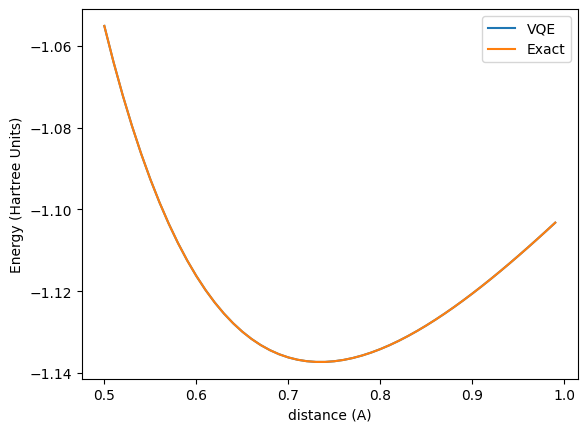

In [ ]:
plt.plot(distances, vqe_energies, label='VQE')
plt.plot(distances, exact_energies, label='Exact')
plt.legend()
plt.xlabel('distance (A)')
plt.ylabel('Energy (Hartree Units)')
plt.show()

Now we have an array that consist of all the energy calculated at various separation of the atoms. we use the min() funstion to find out the minimum energy and we extract the array index that corresponds to this energy value. Then we use this index to find out the separation that corresponds to the minimum energy. This gives us the equilibrium separation of the atoms in Hydrogen molecules.

In [ ]:
E0 = min(vqe_energies)
x = 0
for i in range(0,len(vqe_energies)):
  if vqe_energies[i] == E0:
    x = i

print('The equilibrium distance between two atoms of Hydrogen molecule is: ', dist2[x], ' and the corresponding equilibrium state enrgy is: ', E0)


The equilibrium distance between two atoms of Hydrogen molecule is:  0.7300000000000002  and the corresponding equilibrium state enrgy is:  [-1.13728568]


## **2. Ground State Energy and the dipole moments along different axes and the total dipole moment of the molecule**

We use the Ground state solvers to compute the ground state of a molecular Hamiltionian:
1. We define the molecular system. Here we have to define the hydrogem molecule containing 2 atoms separated at a distance of $0.735 A^\circ$.

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

2. Next we use the Jordan-Wigner mapping to map the Fermionic space to Qubit space.

In [ ]:
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter

converter = QubitConverter(JordanWignerMapper())

3. After this, we define a solver which is actually the algorithm through which the ground state is computed. We use the NumPyMinimumEigensolver, which is the algorithm that exactly diagonalizes the Hamiltonian, hence giving us the ground state energy of the system.

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()



*   VQE algorithm works by exchanging information between a classical and a quantum computer
![](https://qiskit.org/documentation/stable/0.24/_images/vqe.png)

To define VQE solver we need three essential elements:
1. An Estimator primitive: core function that makes it easier to build modular algorithm & applications.
2. A Vartiational from: for example Unitary coupled Cluster (UCC), which acts a the ansatz of the problem
3. An Optimizer: a classical code that optimizes the parameters in the variational form

In [ ]:
from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD

vqe_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.circuit.library import TwoLocal

tl_circuit = TwoLocal(
    rotation_blocks=["h", "rx"],
    entanglement_blocks="cz",
    entanglement="full",
    reps=2,
    parameter_prefix="y",
)

another_solver = VQE(Estimator(), tl_circuit, SLSQP())

In [ ]:
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

calc = GroundStateEigensolver(converter, vqe_solver)

In [ ]:
res = calc.solve(es_problem)
print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030144
  - computed part:      -1.857275030144
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035695
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.38894866]
    - computed part:      [0.0  0.0  1.38894866]
  > Dipole moment (a.u.): [0.0  0.0  0.00000004]  Total: 0.00000004
                 (debye): [0.0  0.0  0.00000009]  Total: 0.00000009
 


In [ ]:
calc = GroundStateEigensolver(converter, numpy_solver)
res = calc.solve(es_problem)
print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.3889487]
    - computed part:      [0.0  0.0  1.3889487]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


## **2. Excited state energy and the dipole moment along different axes and the total dipole moment of the molecule**
To calculate the excited energies we follow the same steps as defined for ground state solver, however, we make use of qEOM (quantum Equation of Motion) algorithm which helps us to access the excited energies of a particular molecule. The EOM method finds the exictation energies (differences in energy between the ground state and all 
th excited states) by solving the following pseudo-eigenvalue problem.

$$\begin{pmatrix} M & Q \\ Q^* & M^*\end{pmatrix} \begin{pmatrix} X_n \\ Y_n \end{pmatrix} = E_{0n} \begin{pmatrix} V & W \\ -W^* & -V^* \end{pmatrix} \begin{pmatrix} X_n \\ Y_n \end{pmatrix} $$

with 

$$M_{\mu_α ν_β} = <0|[(\hat{E}^{(\alpha)}_{μ_α})^†, \hat{H}, \hat{E}^{(β)}_{ν_β}]|0>$$
$$Q_{μ_α ν_β} = - <0|[(\hat{E}^{(\alpha)}_{μ_α})^†, \hat{H}, (\hat{E}^{(β)}_{ν_β})^†]|0>$$
$$V_{μ_α ν_β} = <0|[(\hat{E}^{(\alpha)}_{μ_α})^†, \hat{E}^{(β)}_{ν_β}]|0>$$
$$W_{μ_α ν_β} = - <0|[(\hat{E}^{(\alpha)}_{μ_α})^†, (\hat{E}^{(β)}_{ν_β})^†]|0>$$

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

In [ ]:
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter

converter = QubitConverter(JordanWignerMapper())

In [ ]:
from qiskit_nature.second_q.algorithms import NumPyEigensolverFactory

numpy_solver = NumPyEigensolverFactory(use_default_filter_criterion=True)

To use the qEOM as a solver in Qiskit, we have to define a ground state calculation first, which will provide the required ground state information to the algorithm.

In [ ]:
from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import GroundStateEigensolver, QEOM, VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD

estimator = Estimator()
# This first part sets the ground state solver
solver = VQEUCCFactory(estimator, UCCSD(), SLSQP())
gse = GroundStateEigensolver(converter, solver)

# The qEOM algorithm is simply instantiated with the chosen ground state solver and Estimator primitive
qeom_excited_states_solver = QEOM(gse, estimator, "sd")

In [ ]:
from qiskit_nature.second_q.algorithms import ExcitedStatesEigensolver

numpy_excited_states_solver = ExcitedStatesEigensolver(converter, numpy_solver)
numpy_results = numpy_excited_states_solver.solve(es_problem)

qeom_results = qeom_excited_states_solver.solve(es_problem)

print(numpy_results)
print("\n\n")
print(qeom_results)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== EXCITED STATE ENERGIES ===
 
  1: 
* Electronic excited state energy (Hartree): -0.882722150245
> Total excited state energy (Hartree): -0.162753155796
  2: 
* Electronic excited state energy (Hartree): -0.224911252831
> Total excited state energy (Hartree): 0.495057741618
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
  1:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
  2:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.3889487]
    - computed part:      [0.0  0.0  1.3889487]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  

In [ ]:
import numpy as np


def filter_criterion(eigenstate, eigenvalue, aux_values):
    return np.isclose(aux_values["ParticleNumber"][0], 2.0)


new_numpy_solver = NumPyEigensolverFactory(filter_criterion=filter_criterion)
new_numpy_excited_states_solver = ExcitedStatesEigensolver(converter, new_numpy_solver)
new_numpy_results = new_numpy_excited_states_solver.solve(es_problem)

print(new_numpy_results)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== EXCITED STATE ENERGIES ===
 
  1: 
* Electronic excited state energy (Hartree): -1.244584549813
> Total excited state energy (Hartree): -0.524615555364
  2: 
* Electronic excited state energy (Hartree): -1.244584549813
> Total excited state energy (Hartree): -0.524615555364
  3: 
* Electronic excited state energy (Hartree): -1.244584549813
> Total excited state energy (Hartree): -0.524615555364
  4: 
* Electronic excited state energy (Hartree): -0.882722150245
> Total excited state energy (Hartree): -0.162753155796
  5: 
* Electronic excited state energy (Hartree): -0.224911252831
> Total excited state energy (Hartree): 0.495057741618
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
  1:  # Particles: 2.000 S